# Визуализация данных


Визуализация занимает важную часть в анализе данных. Представляя информацию в графическом виде, вы облегчаете процесс ее восприятия, что дает возможность выделять дополнительные закономерности, оценивать соотношения величин, быстрее доносить ключевые аспекты в данных.

Правильная визуализация поможет работать с данными эффективно, тогда как неправильная может ввести в заблуждение как исследователя, так и пользователей, а также привести к неверным выводам.

Одни из популярных библиотек для визуализации в Python — это `matplotlib, seaborn, plotly`.

In [106]:
import pandas as pd

In [107]:
df = pd.read_csv('train.csv')

Библиотека PANDAS обладает встроенными средствами визуализации. Для этого есть метод `.plot()`:

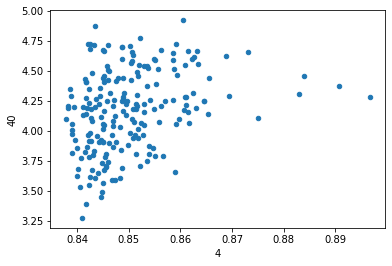

In [108]:
df.plot(kind='scatter', x='4', y='40');

Варианты типов графиков:
- 'line' : line plot (default)
- 'bar' : vertical bar plot
- 'barh' : horizontal bar plot
- 'hist' : histogram
- 'box' : boxplot
- 'kde' : Kernel Density Estimation plot
- 'density' : same as 'kde'
- 'area' : area plot
- 'pie' : pie plot
- 'scatter' : scatter plot (DataFrame only)
- 'hexbin' : hexbin plot (DataFrame only)

## Pandas profiling

In [ ]:
import pandas_profiling

Для создания автоматического отчета по данным, необходимо всего лишь указать датафрейм, который необходимо проанализировать:

In [ ]:
profile = pandas_profiling.ProfileReport(df)

Основные параметры метода:
- title - название отчёта
- pool_size (int) - количество потоков для выполнения (по умолчанию = 0 - используются все потоки)
- progress_bar (bool) - если True, то показывается прогресс бар
- explorative (bool) - если True, то выполняется более глубокий анализ (для текстов и файлов)
- minimal (bool) - если True, то ресурсоёмкие вычисления не выполняются. Рекомендуется при работе с большими датасетами.

Для дальнейшего использования отчёт можно сохранить в HTML формате:

In [ ]:
profile.to_file("your_report.html")

# Библиотека Matplotlib

In [1]:
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# для отображения и хранения графиков в блокноте
%matplotlib inline 

## Линейный график

- отлично подходит для работы с датами, трендами во времени;
- показатель, который хотим отобразить в динамике, откладываем на шкале Y, а время – на шкале X;
- можно на одном графике сравнивать несколько рядов

Сначала построить график на придуманных данных, а затем попробуем это сделать на реальных.

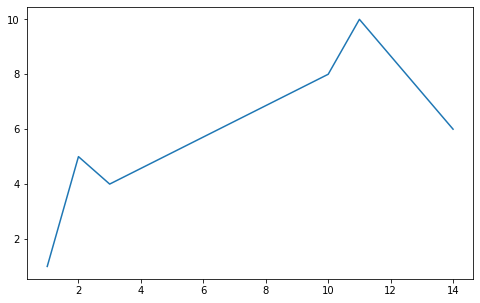

In [2]:
# Создаем рамку для графика. figsize - размер графика, [ширина, высота] в дюймах

plt.figure(figsize = [8, 5])

# для создания линейного графика нам нужны точки (координаты)
x = [1, 2, 3, 10, 11, 14]
y = [1, 5, 4, 8, 10, 6]

# если вы забыли, как вводить аргументы функции, 
# попробуйте ввести plt.plot(), поставить курсор внутри скобок и нажать на Shift + Tab

plt.plot(x, y) # первый аргумент функции plot - то, что откладываем на оси X, а второй - на оси Y.

plt.show() # рисует сам график и выводит его нам в тетрадку

Давайте сделаем график более понятным для восприятия

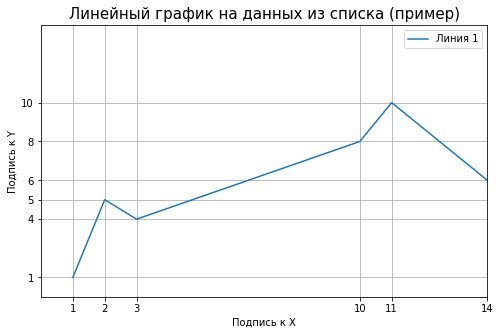

In [3]:
plt.figure(figsize = [8, 5])
x = [1, 2, 3, 10, 11, 14]
y = [1, 5, 4, 8, 10, 6]
plt.plot(x, y, label = 'Линия 1') # label пойдет в легенду

# ниже то, что добавим на график
plt.title('Линейный график на данных из списка (пример)', fontsize = 15) # название + размер шрифта в названии
# аргумент с названием шрифта можно указать так же в xlabel/ylabel

plt.xlabel('Подпись к X') # в скобках вводим текст, который должен появиться в качестве подписи оси х
plt.ylabel('Подпись к Y') # в скобках вводим текст, который должен появиться в качестве подписи оси y

plt.xticks(x) # то где на графике, на оси X будут точки (деления, как на отрезке)
plt.yticks(y) # то где на графике, на оси Y будут точки (деления, как на отрезке)

# в предыдущих двух строках (ticks) нам не обязательно класть те же точки, что и на графике.
# раскомментируйте две следующие строки с "ticks", предварительно закомментрировав предыдущие строки с "ticks"

# с помощью np.linspace мы создаем вектор значений от минимального значения X в списке, до максимального,
# третий аргумент - сколько точек хотим построить между мин. и макс. значением.

# plt.xticks(np.linspace(min(x), max(x), len(x))) # точек может быть больше или меньше, чем длина X 
# plt.yticks(np.linspace(min(y), max(y), len(y)))

plt.legend() # добавляет легенду. Название берется то, что указано в label в plt.plot
plt.grid() # рисует сетку по точкам, указанным в xticks/yticks

# строки ниже задают границы осей x и y. Например, если мы хотим, чтобы обе оси были от нуля до максимума из двух списков, то:
limit_axis = max(*x, *y)
plt.xlim([0, limit_axis])
plt.ylim([0, limit_axis])

plt.show()

**Упражнение**: попробуйте поменять тип шрифта на графике, цвет линии и ее толщину (можно поэкспериментировать и с типом линии, например, сделать ее пунктирной. Это может быть полезно, когда в статьях требуется присылать только черно-белые графики, а в градациях серого сложно отличить одну линию от другой)

Попробуем сделать линейный график на реальных данных. В предложенном датасете есть информация о ценах и объемах торгов валютной парой доллар/рубль, юань/рубль, а также акциями ГАЗПРОМ. Источник: ФИНАМ.



In [137]:
prices = pd.read_excel('Биржевые данные.xlsx')

In [136]:
prices.head()

,Дата,"Доллар, цена открытия","Доллар, максимальная цена","Доллар, минимальная цена","Доллар, цена закрытия","Доллар, объем торгов","Юань, цена открытия","Юань, цена максимальная цена","Юань, минимальная цена","Юань, цена закрытия","Юань, объем торгов","Газпром, цена открытия","Газпром, цена максимальная цена","Газпром, минимальная цена","Газпром, цена закрытия","Газпром, объем торгов"
0,2021-01-04,74.1350,74.4050,73.0550,74.3300,2196588000,11.4660,11.5120,11.3280,11.502,29061000,212.71,216.63,211.64,212.71,55195430.0
1,2021-01-05,74.1125,75.2875,73.8500,74.0400,2696328000,11.5365,11.6639,11.4700,11.510,26548000,213.20,215.38,210.22,215.32,48913740.0
2,2021-01-06,73.7800,74.2075,73.3975,73.9225,2002842000,11.4456,11.5004,11.4100,11.464,29617000,215.48,216.80,213.07,214.38,47897590.0
3,2021-01-08,74.2650,74.8350,73.8175,74.1550,2341573000,11.4780,11.5613,11.4425,11.468,12122000,217.14,226.24,217.00,225.49,100717800.0
4,2021-01-11,74.4325,75.0000,74.2650,74.6600,3943607000,11.4966,11.5639,11.4731,11.530,74169000,225.05,231.00,221.81,227.60,112506470.0


Зачастую в прикладных задачах используются цены закрытия.

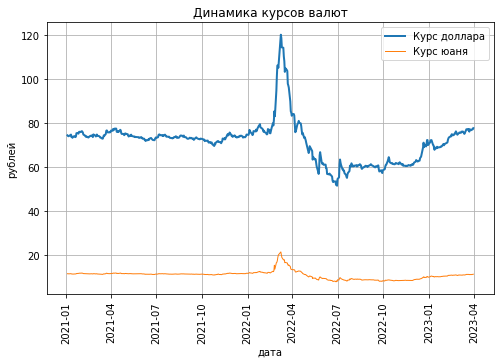

In [138]:
plt.figure(figsize = [8, 5])

plt.plot(prices['Дата'], prices['Доллар, цена закрытия'], label = 'Курс доллара', linewidth = 2) # linewidth - толщина линии
plt.plot(prices['Дата'], prices['Юань, цена закрытия'], label = 'Курс юаня', linewidth = 1)

plt.title('Динамика курсов валют', fontsize = 12)

plt.xlabel('дата')
plt.ylabel('рублей')

plt.xticks(rotation = 90) # поворачивает надписи на оси Ox против часов стрелки на 90 градусов (в обратную можно -90)

plt.legend()
plt.grid()

plt.show()

**Упражнения**: Попробуйте проделать следующие манипуляции с графиком:

- оставить по сетке только горизонтальные или только вертикальные линии
- сделать надписи с датами на оси X в формате Jan (или Янв) 2021 вместо 2021-01
- добавить линию, отражающую средний уровень курса определенной валюты за год (заметьте, что данные содержат значения больше, чем за 1 год, то есть линия будет ломаной)

**Дополнительная информация**:

Как перемещать легенду, менять форму, создать тень и регулировать шрифт https://pyprog.pro/mpl/mpl_adding_a_legend.html

P.S. на том же сайте очень подробно разбираются примеры с другими атрибутами графиков (на русском)

## Диаграмма рассеяния

- полезна для анализа зависимости между двумя переменными
- представляет собой облако точек 

Изучим взаимосвязи на реальных данных по рынку недвижимости за февраль 2023 г.

In [141]:
data = pd.read_excel('Домклик данные за февраль 2023.xlsx', sheet_name = 'итог очищенный')
data.dropna(inplace = True)

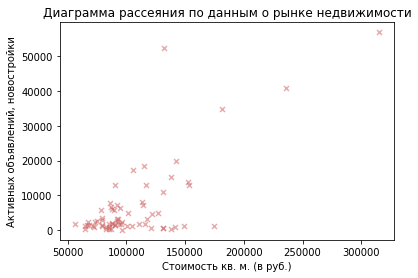

In [145]:
plt.scatter(data['Средняя стоимость м², новостройки'], data['Активных объявлений, новостройки'], 
            color = 'indianred', # меняем цвет точек
            s = 25, # этим параметром можно менять размер точек
            marker = 'x', # точка (маркер) может быть не кругом, а, например, крестиком
            alpha = 0.5 # прозрачность (от 0 до 1). ближе к 1 - прозрачнее
           )
plt.xlabel('Стоимость кв. м. (в руб.)')
plt.ylabel('Активных объявлений, новостройки')
plt.title('Диаграмма рассеяния по данным о рынке недвижимости')
plt.show()

По этой ссылке (смотрим именно **ответы** за вопрос) очень наглядно показано, как можно менять размер точки

https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size

Диаграмму рассеяния можно так же нарисовать с помощью функции plt.plot. Ниже пример:

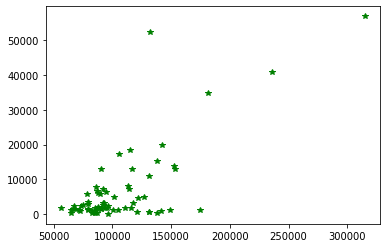

In [146]:
plt.plot(data['Средняя стоимость м², новостройки'], data['Активных объявлений, новостройки'], 'g*'); 
# 'go' - это g - цвет (сокращение от зеленого), * - форма маркера

## Столбчая диаграмма

Подходит для сравнения между различными категориями. Например, разрез по регионам, полу, статусу и пр.

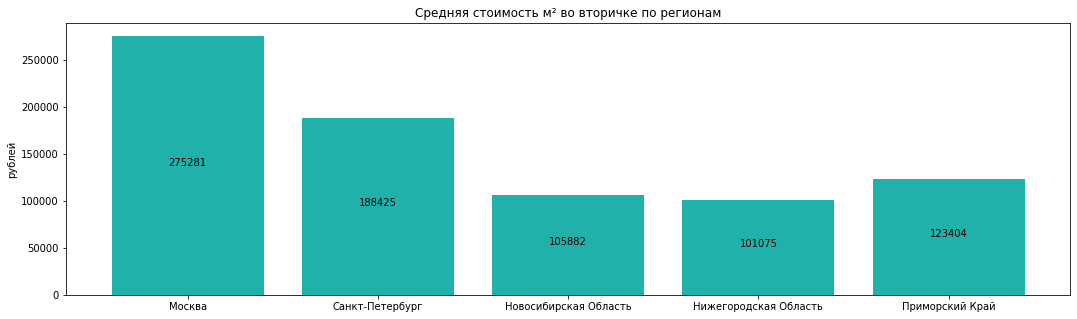

In [147]:
# выделим некоторые регионы 
df = data[data['Регион'].isin([
    'Москва', 
    'Санкт-Петербург', 
    'Нижегородская Область', 
    'Новосибирская Область', 
    'Приморский Край'
])]

plt.figure(figsize = [18, 5])
# воспользуемся функцией bar (заполняем аргументы так же, как и в предыдущем случае)
plt.bar(df['Регион'], df['Средняя стоимость м², вторичка'], color = 'lightseagreen')

# ниже вариант того, как можно добавить текст на столбчатую диаграмму
for i in range(df['Регион'].shape[0]):
    plt.text(
        i, 
        df['Средняя стоимость м², вторичка'].iloc[i] / 2,
        df['Средняя стоимость м², вторичка'].iloc[i], 
        ha = 'center'
    )

# plt.xlabel('Регион')
plt.ylabel('рублей')
plt.title('Средняя стоимость м² во вторичке по регионам')
plt.show()

Поскольку выше рассматривается только 1 показатель, то легенду добавлять необязательно, т.к. из названия становится понятно, что конкретно изображено.

Давайте теперь попробуем построить столбчатую диаграмму с несколькими показателями, а также скомбинируем графики, которые научились рисовать.

Представим, что у официанта в кафе ежедневная оплата труда, при этом у него есть ежедневные расходы. Отобразим на столбчатой диаграмме его доходы и траты за неделю.

In [148]:
budget = pd.DataFrame(
    {
        'День недели': ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'],
        'Доход': [1200, 900, 0, 1100, 1700, 1500, 0],
        'Расход': [-400, -800, -700, -200, -350, -500, -1800]
    }
)

# добавим остаток (разницу между доходом и расходом на каждый день)
budget['Остаток'] = budget['Доход'] + budget['Расход']

# и посчитаем накопленным итогом (т.е. если остаток в 1 день 800, а во второй 100, то к концу второго дня остаток = 900)
budget['Накопленный остаток'] = budget['Остаток'].cumsum() # кумулятивная сумма

budget

,День недели,Доход,Расход,Остаток,Накопленный остаток
0,Понедельник,1200,-400,800,800
1,Вторник,900,-800,100,900
2,Среда,0,-700,-700,200
3,Четверг,1100,-200,900,1100
4,Пятница,1700,-350,1350,2450
5,Суббота,1500,-500,1000,3450
6,Воскресенье,0,-1800,-1800,1650


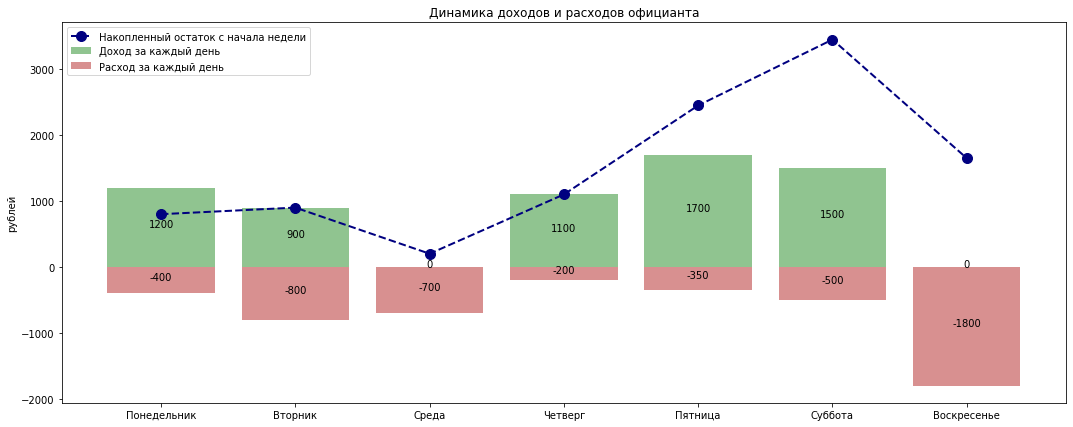

In [149]:
plt.figure(figsize = [18, 7])

plt.bar(budget['День недели'], budget['Доход'], color = 'forestgreen', alpha = 0.5, label = 'Доход за каждый день')
plt.bar(budget['День недели'], budget['Расход'], color = 'firebrick', alpha = 0.5, label = 'Расход за каждый день')
plt.plot(budget['День недели'], budget['Накопленный остаток'], 
         'o--', # точки круглые, линия пунктирная
         color = 'navy', 
         linewidth = 2, # толщина линии
         markersize = 10, # размер точки
#          alpha = 0.7
         label = 'Накопленный остаток с начала недели'
        )

# ниже вариант того, как можно добавить текст на столбчатую диаграмму
for i in range(budget['День недели'].shape[0]):
    plt.text(
        i, 
        budget['Доход'].iloc[i] / 2,
        budget['Доход'].iloc[i],
        ha = 'center'
    )
    plt.text(
        i, 
        budget['Расход'].iloc[i] / 2,
        budget['Расход'].iloc[i],
        ha = 'center'
    )

plt.legend()
plt.ylabel('рублей')
plt.title('Динамика доходов и расходов официанта')
plt.show()

**Упражнение**: Попробуйте создать похожий график, но при условии, что существует несколько источников дохода (подработка, стипендия, карманные деньги), а также несколько видов расходов (транспорт, питание, одежда и пр.).

## Круговая диаграмма

- удобна для отображения состава чего-либо (функция для нее называется plt.pie - как пирог, удобно запомнить, что в pie вы можете отобразить *состав* пирога :))
- имеет смысл отражать небольшое количество составляющих. Если у вас их, например, 20, то можно отобразить 5 наиболее крупных, а остальных объединить в раздел "иное"/"другое".

Из предыдущего примера мы понимаем, что состав расходов может быть разным. Давайте зададим его:

In [150]:
consumption = pd.DataFrame(
    {
        'Тип расхода': ['Проезд', 'Одежда', 'Питание', 'Развлечения'],
        'Сумма расхода, руб.': [100, 950, 600, 400]
    }
)
consumption

,Тип расхода,"Сумма расхода, руб."
0,Проезд,100
1,Одежда,950
2,Питание,600
3,Развлечения,400


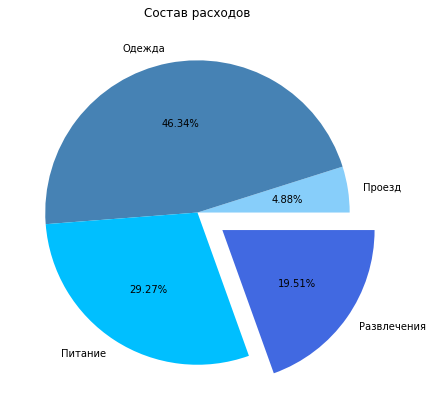

In [151]:
plt.figure(figsize = [7, 7])

plt.pie(
    x = consumption['Сумма расхода, руб.'],
    labels = consumption['Тип расхода'],
    # explode - под каждый тип расхода насколько "вытащить" сектор из круга. полезно, если нужно акцентировать на нем внимание
    explode = [0, 0, 0, 0.2], 
    colors = ['lightskyblue', 'steelblue', 'deepskyblue', 'royalblue'],
    autopct = '%1.2f%%', # этим параметром задаем формат строки вывода процентов (они считаются автоматически)
    pctdistance = 0.6, # насколько отдалены надписи с процентами от центра
    labeldistance = 1.1, # насколько отдалены надписи с типом расходов от центра
#     radius = 0.7, # изменить радиус круга
)

plt.title('Состав расходов')
plt.show()

**Упражнение**: не менее красивыми выгрядят графики, в центре которых есть пустое пространство (внутри него можно добавить надпись, например, год, если вы хотите показать именно в таком виде сравнение по годам). Поэтому попробуйте самостоятельно разобраться с тем, как нарисовать подобный график (см. 2 последних графика из примера здесь https://proclusacademy.com/blog/customize_matplotlib_piechart/)

## Гистограмма

- позволяет проанализировать распределение количественной переменной
- в таком графике рассматривается одна переменная 
- каждый столбик в гистограмме отражает диапазон значений (по оси X), а высота столбца (ось Y) - количество (частоту) значений, попавших в диапазон.

Построим гистограмму на основе данных о ежедневных доходностях акций Газпрома. Для того чтобы посчитать доходность, нужно разницу между ценой сегодня и вчера разделить на вчерашнюю цену.

In [152]:
gazprom = prices[['Дата', 'Газпром, цена закрытия']]
gazprom['Дневная доходность'] = gazprom['Газпром, цена закрытия'].pct_change()
gazprom.dropna(inplace = True)

In [153]:
gazprom.head()

,Дата,"Газпром, цена закрытия",Дневная доходность
1,2021-01-05,215.32,0.012270
2,2021-01-06,214.38,-0.004366
3,2021-01-08,225.49,0.051824
4,2021-01-11,227.60,0.009357
5,2021-01-12,228.69,0.004789


Средняя дневная доходность акций Газпрома составила 0.0161%


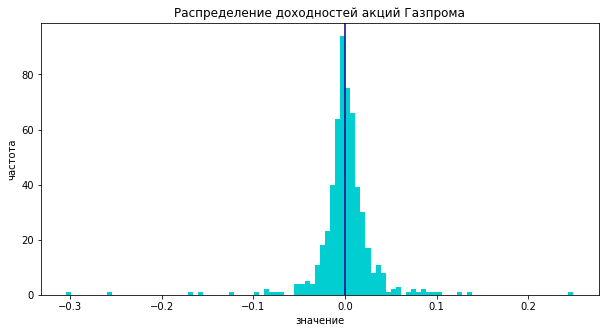

In [155]:
plt.figure(figsize = [10, 5])

plt.hist(gazprom['Дневная доходность'], color = 'darkturquoise',
         bins = 100 # количество отрезков, на которые делится ось X или число столбиков
        )

# можно добавить так же на график вертикальные линии, которые, к примеру будут показывать квантиль / среднее или иные характеристики

# Например, добавим среднюю дневную доходность за рассматриваемый период
avg_return_gazp = gazprom['Дневная доходность'].mean()

print(f'Средняя дневная доходность акций Газпрома составила {round(avg_return_gazp * 100, 4)}%')
plt.axvline(x = avg_return_gazp, color = 'darkblue') # добавляем вертикальную линию
plt.ylabel('частота')
plt.xlabel('значение')
plt.title('Распределение доходностей акций Газпрома')
plt.show()

## Ящик с усами

Дополнительную информацию о распределении переменной можно получить из графика "ящик с усами"

<img src="https://github.com/aaparshina/22-23_Intro-to-DS/blob/main/PICS/image.png?raw=true">

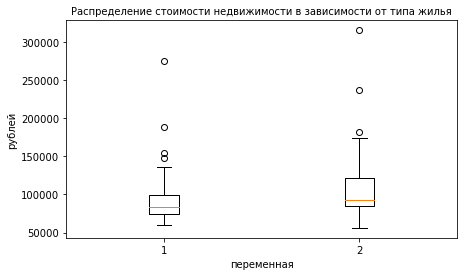

In [20]:
plt.figure(figsize = [7, 4])

plt.boxplot(data[['Средняя стоимость м², вторичка', 'Средняя стоимость м², новостройки']])
plt.ylabel('рублей')
plt.xlabel('переменная')
plt.title('Распределение стоимости недвижимости в зависимости от типа жилья', fontsize = 10)
plt.show()

Краткая выжимка:

- **plt.plot** - линейный график (динамика)
- **plt.scatter** - диаграмма рассеяния (выявление зависимостей). можно и с помощью plt.plot, но лучше scatter
- **plt.bar** - столбчатый график (сравнение категорий по 1 или нескольким показателям)
- **plt.pie** - круговая диаграмма (состав)
- **plt.hist** - гистограмма (распределение)
- **plt.boxplot** - ящик с усами (распределение: выбросы, интерквартильный размах, медиана)

## Комбинация графиков

Ниже рассмотрим пример того, как можно нарисовать несколько графиков на одном

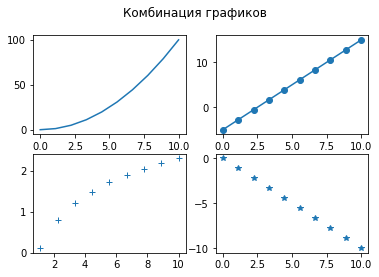

In [21]:
x = np.linspace(0, 10, 10)

fig, axs = plt.subplots(
    nrows = 2,
    ncols = 2, 
    sharex = False, # если True, то будет одна ось Ox для всех графиков 
    sharey = False # если True, то будет одна ось Oy
)
fig.suptitle('Комбинация графиков')
axs[0, 0].plot(x, x ** 2)
axs[0, 1].plot(x, x * 2 - 5, 'o-')
axs[1, 0].plot(x, np.log(x) , '+')
axs[1, 1].plot(x, x * (-1), '*')
fig.show()

# Библиотека Seaborn

**SEABORN** – библиотека для создания статистических графиков.

К функциям и особенностям библиотеки можно отнести:
- Создание и визуализация графиков на основе данных.
- Выразительный высокоуровневый интерфейс и более эстетичные графики.
- Синтаксис позволяет сосредоточиться на графиках, а не деталях их построения.

Больше деталей, примеров и более подробное описание вы можете найти на [странице документации](https://seaborn.pydata.org).

Загрузка библиотеки:

In [133]:
import seaborn as sns

In [111]:
df_small = df[['1','3','4','5','6','37','40']]

## Диаграмма рассеяния (scatter plot)

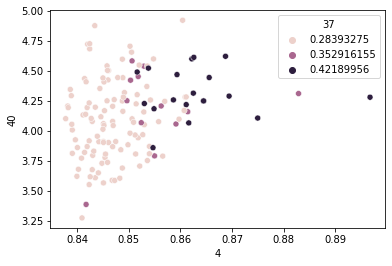

In [112]:
sns.scatterplot(data=df_small, x="4", y="40", hue='37')
plt.show()

Для изменения размера графика необходимо использовать библиотеку **MATPLOTLIB**, на которой основана библиотека **SEABORN**, и конкретно команду `plt.figure(figsize=(X, Y))`, где `X` - размер по оси x, `Y` - размер по оси y:

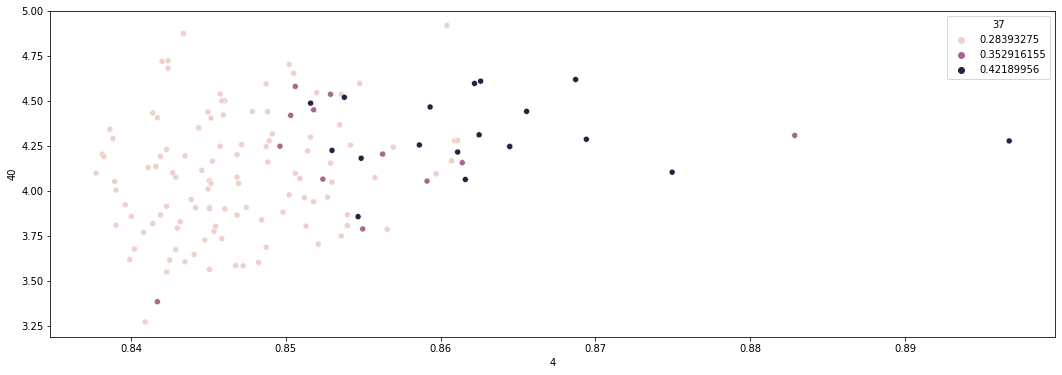

In [113]:
plt.figure(figsize=(18,6))
sns.scatterplot(data=df, x="4", y="40", hue='37')
plt.show()

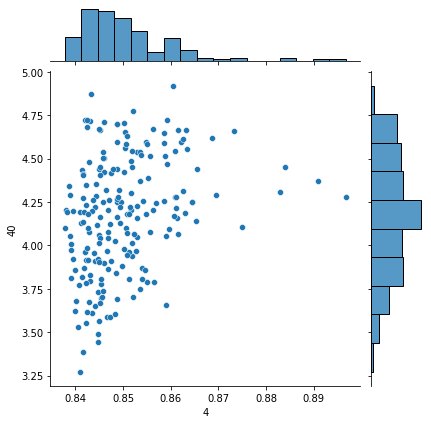

In [114]:
sns.jointplot(x='4', y='40', data=df, kind='scatter')
plt.show()

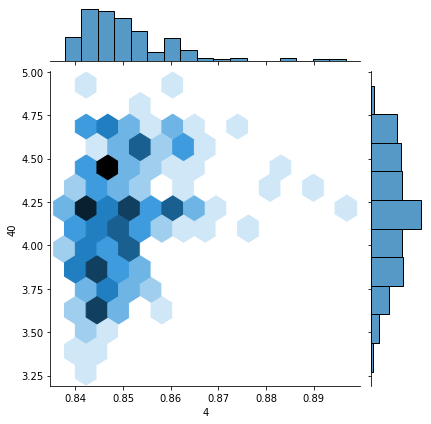

In [115]:
sns.jointplot(x='4', y='40', data=df, kind='hex')
plt.show()

## Попарные графики (pair plot)

Распрелеление каждой переменной и их двумерные графики (каждый с каждым) можно отобразить с помощью функции sns.pairplot

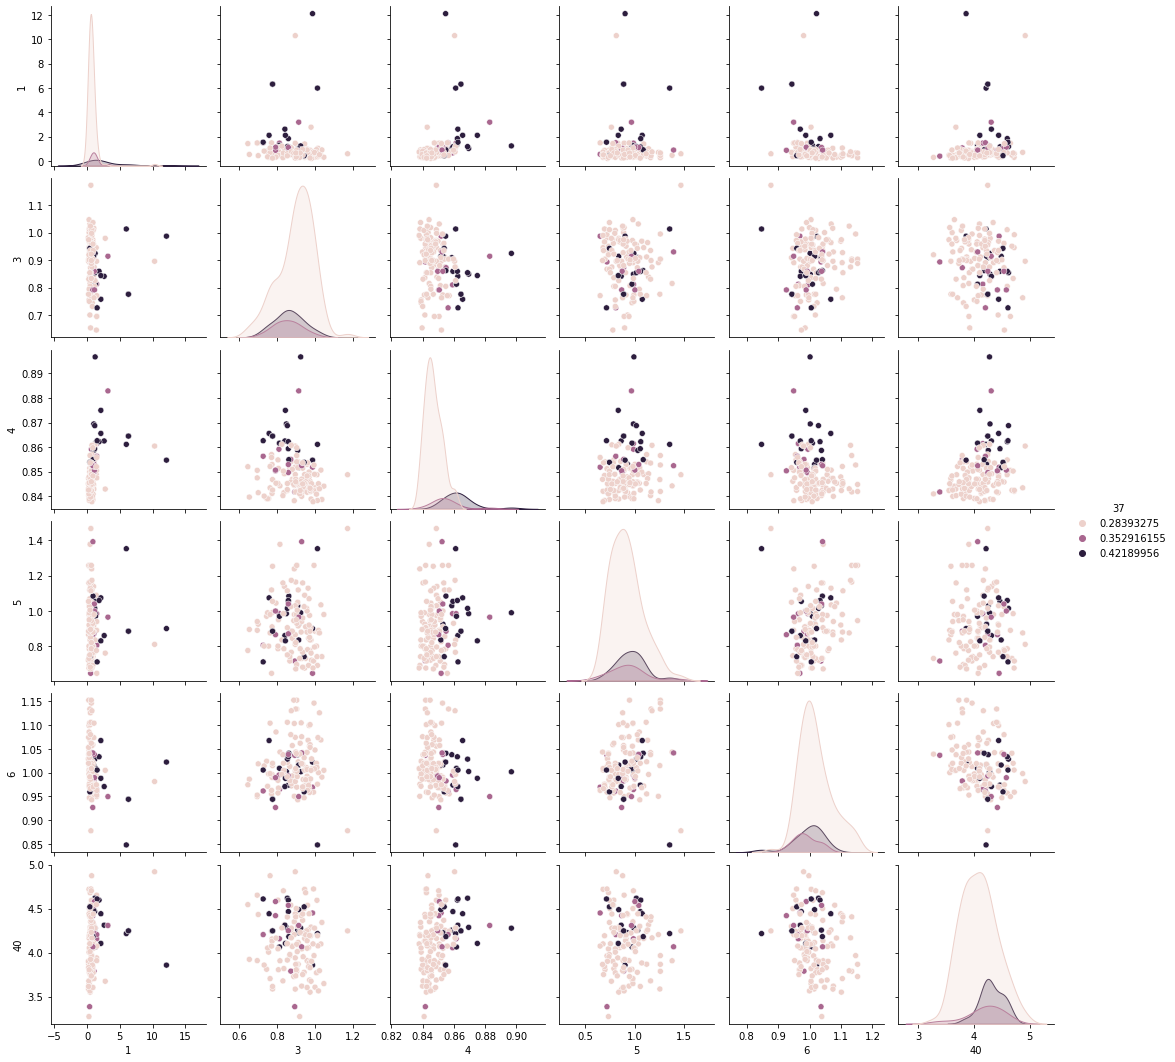

In [92]:
sns.pairplot(df_small, hue='37');

## Тепловая карта (heat map)

Линейную взаимосвязь можно заметить с помощью коэффициента корреляции. Ниже попробуем нарисовать матрицу корреляции, закрашенную цветом.

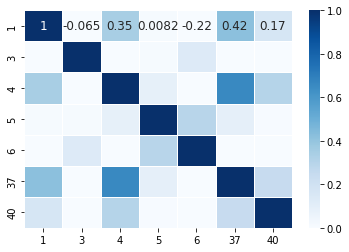

In [116]:
sns.heatmap(df_small.corr(), # на вход подается матрица корреляции, а не исходные данные!
            linewidths = 0.5, # толщина линии между квадратами
            annot = True, # добавить надписи со значениями коэффициента корреляции
            annot_kws = {'size': 12}, # размер шрифта (для annot параметра)
            cmap='Blues', # изменение цветовой шкалы
            vmax = 1, # максимальное значение шкалы
            vmin = 0, # минимальное значение шкалы
           );

## Визуализация распределения (displot)

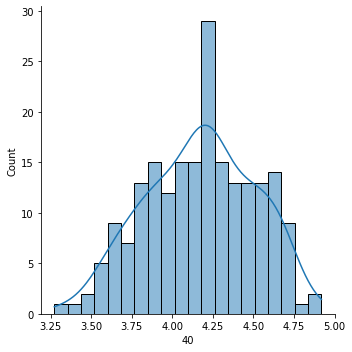

In [117]:
sns.displot(df_small['40'], kde=True, bins=20); 

## Диаграмма размаха (box plot)

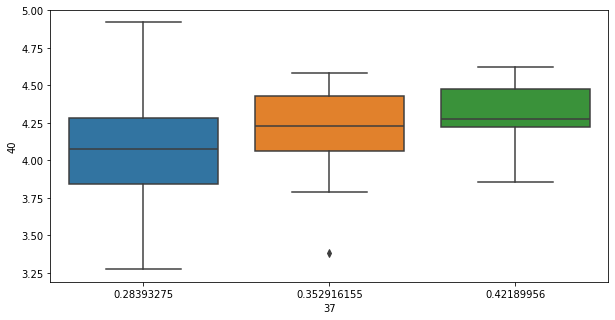

In [118]:
plt.figure(figsize = [10, 5])
sns.boxplot(data=df_small, x='37', y='40');

# Библиотека PLOTLY

**PLOTLY** – библиотека для создания интерактивных графиков.

К функциям и особенностям библиотеки можно отнести:
- Интерактивная визуализация данных.
- Изучение данных «на лету» (не перестраивая график, изменяя масштаб, включая/выключая какие-то данные).
- Построение полноценного интерактивного отчёта (дашборд).

Больше деталей, примеров и более подробное описание вы можете найти на [странице документации](https://plotly.com/python/).

Подключим необходимые модули:

In [119]:
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

`Express` является надстройкой над `graph_objects` с упрощенным интерфейсом, поэтому рекомендуется пользоваться именно им, а к `graph_objects` прибегать, когда функционала экспресса не хватает.

In [120]:
import plotly.io as pio
pio.renderers.default = 'iframe'

Cамый простой способ быстро нарисовать линейные графики через plotly express:

In [121]:
px.line(df, x = df.index, y='40')

## Диаграмма размаха (Box plot, ящик с усами)

Строим график с ящиками с усами. Два типа построения:

In [122]:
# тип 1
fig = px.box(df, x='37', y='40')
fig.show()

In [123]:
# тип 2
fig = go.Figure(data=go.Box(
    x = df['37'],
    y = df['40'],
    marker = dict(color='orange')
    ))
fig.show()

## Диаграмма рассеяния (Scatter plot)

Выполним небольшое преобразование данных:

In [124]:
new = df.copy()
new['37'] = new['37'].fillna(-1).astype('category')

Построим график:

In [125]:
fig = px.scatter(new, x='4', y='40', color='37')
fig.show()

In [126]:
fig = px.scatter(new, x='11', y='4', opacity=0.2)
fig.show()

## Построение нескольких графиков на одном полотне

In [127]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = df.index,
    y = df['7']
    ))
fig.add_trace(go.Scatter(
    x = df.index,
    y = df['3']
))
fig.add_trace(go.Scatter(
    x = df.index,
    y = df['40']
))
fig.add_trace(go.Scatter(
    x = df.index,
    y = df['19']
))
fig.show()

In [128]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = df.index,
    y = df['7'],
    connectgaps=True, # соединение пропусков
    mode = 'lines', # тип отображения графика
    line = dict(color='crimson', # цвет
                width=2, # толщина линии
                dash='dot'), # типы линии (пунктир, штриховые, сплошная и тд)
    name = '7' # название (лейбл) линии
    ))
fig.add_trace(go.Scatter(
    x = df.index,
    y = df['3'],
    mode = 'lines+markers',
    name = '3',
    marker = dict(color='royalblue')
))
fig.add_trace(go.Scatter(
    x = df.index,
    y = df['40'],
    mode = 'markers',
    name = '40',
    marker = dict(color='grey')
))
fig.add_trace(go.Scatter(
    x = df.index,
    y = df['19'],
    mode = 'lines+markers',
    name = '13',
    connectgaps=True,
    line_shape='hv', # форма графика
    marker = dict(color='green')
))
fig.show()

## Гистограмма

In [129]:
fig = px.histogram(new, x='40', marginal='box', nbins=30)
fig.show()

In [130]:
fig = px.histogram(new, x='40', marginal='box', nbins=30, color='37')
fig.show()

## Столбчатая диаграмма

In [131]:
fig = px.bar(new, x='36', y='40',color = '37',
    barmode = 'group',
    title = 'Название графика')
fig.show()

## График параллельных координат (паутина)

In [132]:
px.parallel_coordinates(df[['1','2','3','4','5']])